In [74]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib

1. Hiển thị toàn bộ dữ liệu

In [75]:
data = pd.read_csv("P4AI_BT1.csv")
print("Toàn bộ dữ liệu:")
display(data)

Toàn bộ dữ liệu:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,NaN,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,NaN,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,NaN,5.0,1.9,Virginica
147,NaN,NaN,5.2,2.0,Virginica
148,NaN,3.4,NaN,2.3,Virginica


2. Điền các giá trị bị thiếu

In [76]:
data_clone = data.copy()
numeric_columns = data_clone.select_dtypes(include='number').columns
categorical_columns = data_clone.select_dtypes(exclude='number').columns

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

data_clone[numeric_columns] = imputer_numeric.fit_transform(data_clone[numeric_columns])
data_clone[categorical_columns] = imputer_categorical.fit_transform(data_clone[categorical_columns])

data_clone[numeric_columns] = data_clone[numeric_columns].round(1)
display(data_clone)

header = ','.join(data.columns)
data_clone.to_csv('bai2.csv', index=False, header=header)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,3.7,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,1.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,3.1,5.0,1.9,Virginica
147,5.9,3.1,5.2,2.0,Virginica
148,5.9,3.4,3.7,2.3,Virginica


3. Hiển thị các bản ghi có sepal.length > 5 và sepal.width > 3

In [77]:
filled_data = pd.read_csv("bai2.csv")
filtered_data = filled_data[(filled_data['sepal.length'] > 5) & (filled_data['sepal.width'] > 3)]
print("Các bản ghi thỏa mãn điều kiện:")
display(filtered_data)
filtered_data.to_csv('bai3.csv',index = False)

Các bản ghi thỏa mãn điều kiện:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,5.9,3.4,1.4,0.3,Setosa
7,5.9,3.4,1.5,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,3.1,1.2,0.2,Setosa
15,5.7,4.4,1.5,1.2,Setosa
16,5.4,3.9,1.3,0.4,Setosa
17,5.1,3.5,1.4,0.3,Virginica
18,5.7,3.8,1.7,1.2,Setosa


4. Chuẩn hóa dữ liệu theo min max

In [78]:
ex4_data = pd.read_csv("bai2.csv")
scaler = MinMaxScaler()
numeric_columns_ex4 = ex4_data.select_dtypes(include='number').columns
ex4_data[numeric_columns] = scaler.fit_transform(ex4_data[numeric_columns])
print(ex4_data)
ex4_data.to_csv('bai4.csv', index = False)


     sepal.length  sepal.width  petal.length  petal.width    variety
0        0.222222     0.625000      0.067797     0.041667     Setosa
1        0.166667     0.416667      0.457627     0.041667     Setosa
2        0.111111     0.500000      0.050847     0.041667     Setosa
3        0.083333     0.458333      0.084746     0.458333     Setosa
4        0.194444     0.666667      0.067797     0.041667     Setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667      0.711864     0.916667  Virginica
146      0.555556     0.458333      0.677966     0.750000  Virginica
147      0.444444     0.458333      0.711864     0.791667  Virginica
148      0.444444     0.583333      0.457627     0.916667  Virginica
149      0.444444     0.416667      0.694915     0.708333  Virginica

[150 rows x 5 columns]


5. Liên tục hóa thuộc tính variety

In [79]:
ex5_data = pd.read_csv("bai4.csv")
ex5_data['variety'].unique()

dummies = pd.get_dummies(ex5_data['variety']).astype(int)
ex5_data = pd.concat([ex5_data,dummies], axis = 1)
label_encoder = LabelEncoder()
ex5_data['variety'] = label_encoder.fit_transform(ex5_data['variety'])

ex5_data.to_csv('bai5.csv', index = False)
display(ex5_data)

# label_encoder = LabelEncoder()
# data['variety'] = label_encoder.fit_transform(data['variety'])

,sepal.length,sepal.width,petal.length,petal.width,variety,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,0,1,0,0
1,0.166667,0.416667,0.457627,0.041667,0,1,0,0
2,0.111111,0.500000,0.050847,0.041667,0,1,0,0
3,0.083333,0.458333,0.084746,0.458333,0,1,0,0
4,0.194444,0.666667,0.067797,0.041667,0,1,0,0
...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0,0,1
146,0.555556,0.458333,0.677966,0.750000,2,0,0,1
147,0.444444,0.458333,0.711864,0.791667,2,0,0,1
148,0.444444,0.583333,0.457627,0.916667,2,0,0,1


6. Rời rạc hóa thuộc tính sepal.length

In [80]:
ex6_data = pd.read_csv("bai5.csv")
ex6_data['sepal.length_discrete'] = pd.cut(ex6_data['sepal.length'], bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1],
       labels=["Very Low", "Low", "Medium", "High", "Very High"])
display(ex6_data)
ex6_data.to_csv('bai6.csv', index = False)

,sepal.length,sepal.width,petal.length,petal.width,variety,Setosa,Versicolor,Virginica,sepal.length_discrete
0,0.222222,0.625000,0.067797,0.041667,0,1,0,0,Low
1,0.166667,0.416667,0.457627,0.041667,0,1,0,0,Very Low
2,0.111111,0.500000,0.050847,0.041667,0,1,0,0,Very Low
3,0.083333,0.458333,0.084746,0.458333,0,1,0,0,Very Low
4,0.194444,0.666667,0.067797,0.041667,0,1,0,0,Very Low
...,...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0,0,1,High
146,0.555556,0.458333,0.677966,0.750000,2,0,0,1,Medium
147,0.444444,0.458333,0.711864,0.791667,2,0,0,1,Medium
148,0.444444,0.583333,0.457627,0.916667,2,0,0,1,Medium


7. Lấy mẫu ngẫu nhiên có lặp lại 50% dữ liệu

In [81]:
ex7_data = pd.read_csv("bai6.csv")
sampled_data = resample(ex7_data, replace=True, n_samples=int(0.5 * len(ex7_data)))
print(sampled_data)
sampled_data.to_csv('bai7.csv', index = False)


     sepal.length  sepal.width  petal.length  petal.width  variety  Setosa  \
149      0.444444     0.416667      0.694915     0.708333        2       0   
116      0.611111     0.416667      0.762712     0.708333        2       0   
144      0.666667     0.458333      0.796610     1.000000        2       0   
98       0.222222     0.208333      0.338983     0.416667        1       0   
55       0.388889     0.333333      0.457627     0.500000        1       0   
..            ...          ...           ...          ...      ...     ...   
7        0.444444     0.583333      0.084746     0.041667        0       1   
123      0.555556     0.291667      0.661017     0.708333        2       0   
10       0.305556     0.708333      0.084746     0.041667        0       1   
0        0.222222     0.625000      0.067797     0.041667        0       1   
98       0.222222     0.208333      0.338983     0.416667        1       0   

     Versicolor  Virginica sepal.length_discrete  
149         

 8. Xây dựng mô hình hồi quy tuyến tính

In [82]:
ex8_data = pd.read_csv("bai4.csv")

# Separate the features (X) and the target variable (y)
X = ex8_data.drop('variety', axis=1)
y = ex8_data['variety']

# Encode the target variable to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a mapping dictionary for the encoded labels
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the linear regression model
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

# Evaluate the model
accuracy = linear_regression_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict the variety for a new sample
new_sample = [[0.38888888888888884,0.33333333333333326,0.4576271186440678,0.4]]
predicted_variety_encoded = linear_regression_model.predict(new_sample)

# Convert the predicted value to categorical value
predicted_variety = label_mapping.get(int(predicted_variety_encoded), "Unknown")
print("Predicted Variety:", predicted_variety)

#
# print("Kết quả hồi quy tuyến tính:")
# print("Hệ số: ", linear_regression_model.coef_)
# print("Intercept: ", linear_regression_model.intercept_)

Accuracy: 0.7262654946002423
Predicted Variety: Versicolor


C:\Users\ducan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ducan\AppData\Local\Temp\ipykernel_24912\1145349282.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_variety = label_mapping.get(int(predicted_variety_encoded), "Unknown")


9. Sử dụng PCA và t-SNE để giảm chiều dữ liệu xuống 2 chiều và hiển thị dữ liệu trong không gian 2 chiều

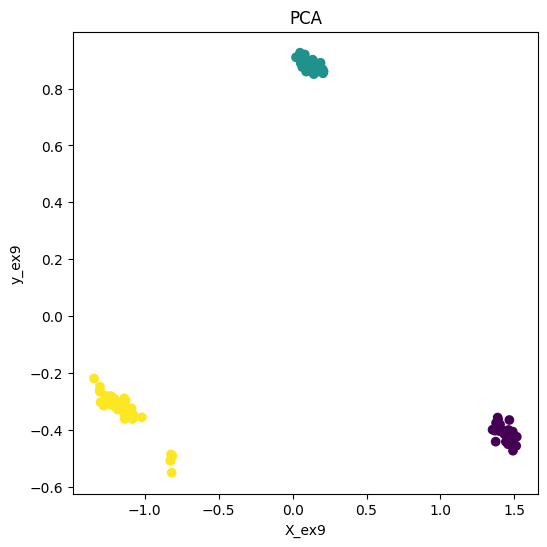

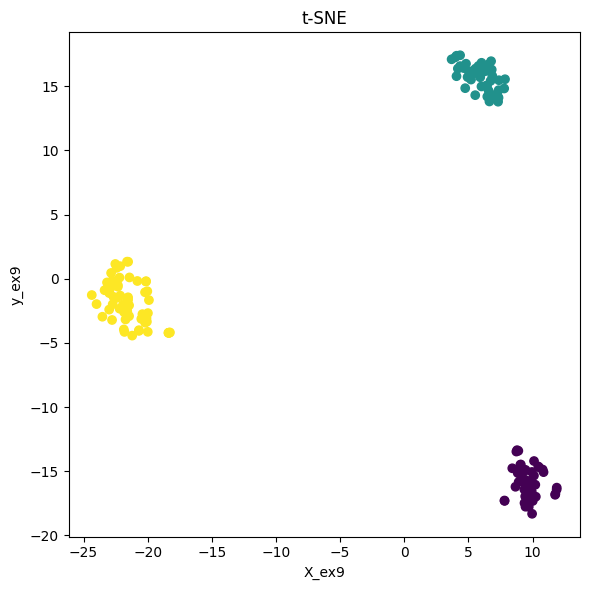

In [83]:
ex9_data = pd.read_csv("bai5.csv")
X_ex9 = ex9_data.drop('variety', axis=1)
y_ex9 = ex9_data['variety']



pca = PCA(n_components=2)
X_pca = pca.fit_transform(ex9_data)
# display(X_pca)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(ex9_data)
# display(X_tsne)

plt.figure(figsize= (6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_ex9)
plt.xlabel("X_ex9")
plt.ylabel("y_ex9")
plt.title('PCA')


plt.figure(figsize= (6,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_ex9)
plt.title('t-SNE')
plt.xlabel("X_ex9")
plt.ylabel("y_ex9")
plt.tight_layout()
plt.show()


10. Phân cụm dữ liệu sử dụng DBSCAN

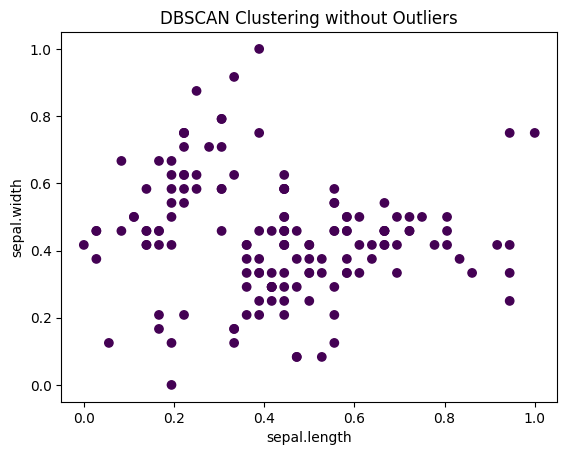

In [84]:
import numpy as np
ex10_data = pd.read_csv("bai4.csv")

# Lấy hai thuộc tính sepal.length và sepal.width
X_ex10 = ex10_data[['sepal.length', 'sepal.width']]

# Xây dựng mô hình DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Phân loại dữ liệu
labels = dbscan.fit_predict(X_ex10)
# print(labels)
# Lấy chỉ mục các điểm dữ liệu cốt lõi
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
# display(core_samples_mask)


# Loại bỏ ngoại lai
X_no_outliers = X_ex10[core_samples_mask]
# display(X_no_outliers)
labels_no_outliers = labels[core_samples_mask]
# display(labels_no_outliers)

# Hiển thị dữ liệu sau khi loại bỏ ngoại lai
plt.scatter(X_no_outliers['sepal.length'], X_no_outliers['sepal.width'], c=labels_no_outliers)
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.title("DBSCAN Clustering without Outliers")
plt.show()
